**Comparison of Several Machine Learning Models in Predicting Diabetes from Health Indicator Data**

To-Do list:
1. Pahamin data
2. EDA
3. Splitting data
4. Base Model
5. Boosting model
6. Matrix hasil base model dan oosting model
7. Comparison base model dan boosting model
8. Kesimpulan

DATASET:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read & EDA

In [ ]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
df = df.drop(columns=['NoDocbcCost', 'AnyHealthcare', 'Income', 'Education'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  GenHlth               253680 non-null  float64
 13  MentHlth              253680 non-null  float64
 14  PhysHlth              253680 non-null  float64
 15  

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


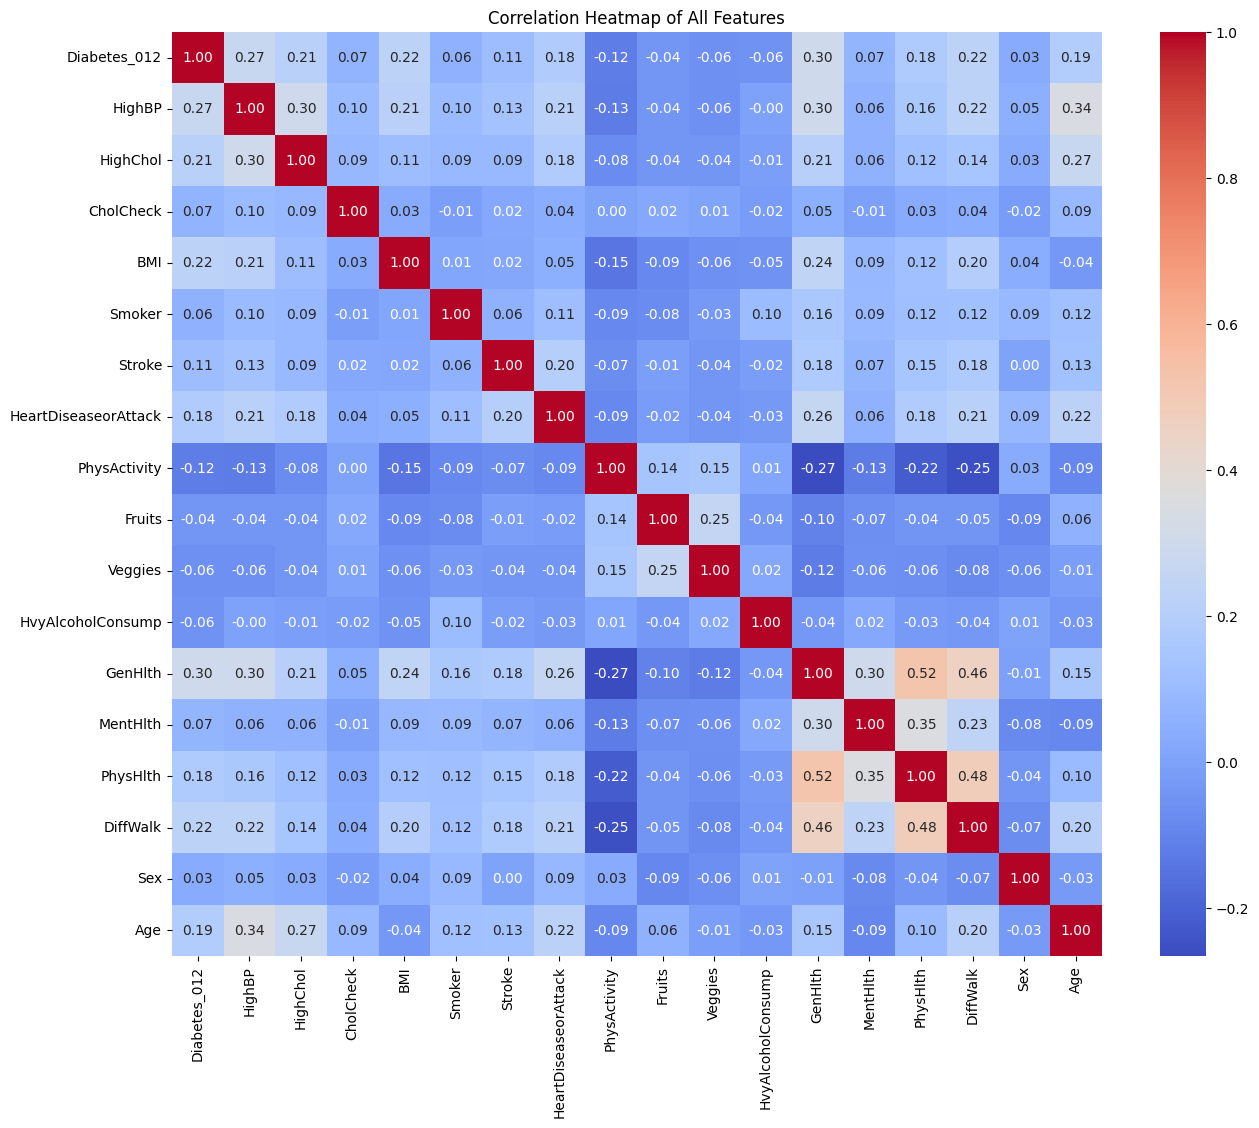

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.show()

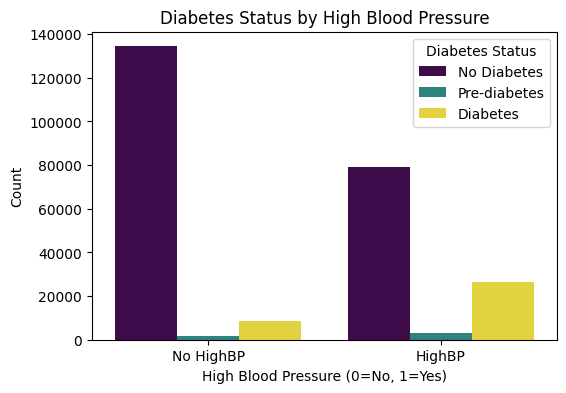

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='HighBP', hue='Diabetes_012', palette='viridis')
plt.title('Diabetes Status by High Blood Pressure')
plt.xlabel('High Blood Pressure (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No HighBP', 'HighBP'])
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.show()

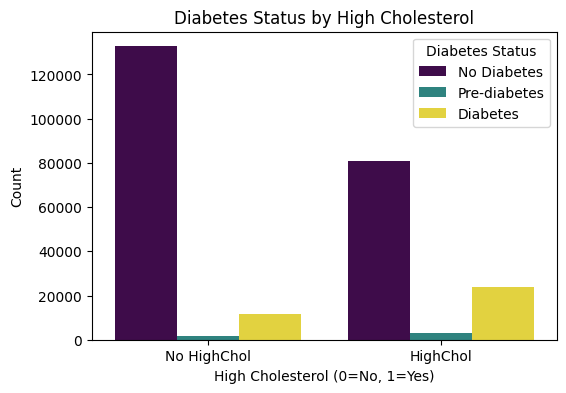

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='HighChol', hue='Diabetes_012', palette='viridis')
plt.title('Diabetes Status by High Cholesterol')
plt.xlabel('High Cholesterol (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No HighChol', 'HighChol'])
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.show()

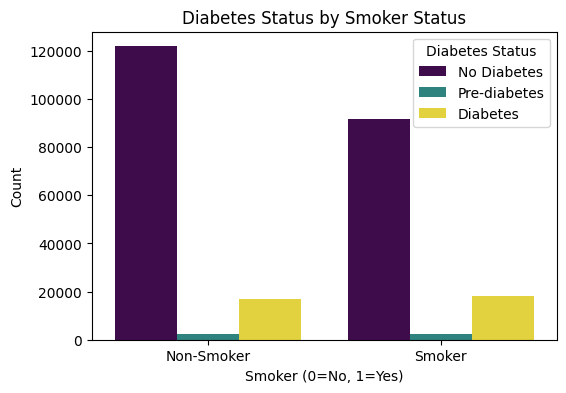

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Smoker', hue='Diabetes_012', palette='viridis')
plt.title('Diabetes Status by Smoker Status')
plt.xlabel('Smoker (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.show()

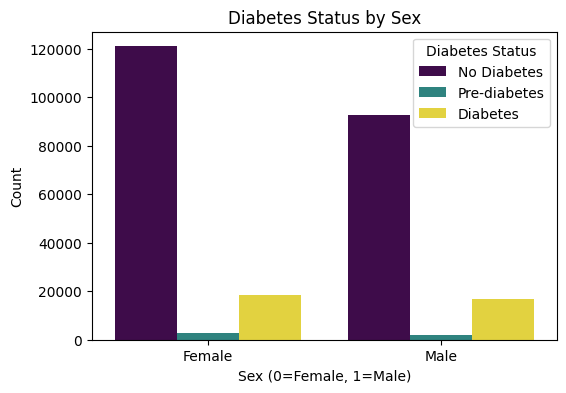

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Diabetes_012', palette='viridis')
plt.title('Diabetes Status by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.show()

#split & modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (202944, 17)
X_test shape: (50736, 17)
y_train shape: (202944,)
y_test shape: (50736,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier model trained successfully.


In [ ]:
import sys
!{sys.executable} -m pip install catboost

from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(random_state=42, verbose=0, allow_writing_files=False)
cb_model.fit(X_train, y_train)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00
CatBoostClassifier model trained successfully.


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBoostClassifier model trained successfully.


#Base Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='macro', zero_division=0)
rf_recall = recall_score(y_test, rf_predictions, average='macro', zero_division=0)
rf_f1 = f1_score(y_test, rf_predictions, average='macro', zero_division=0)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision (macro): {rf_precision:.4f}")
print(f"Recall (macro): {rf_recall:.4f}")
print(f"F1-score (macro): {rf_f1:.4f}")

Accuracy: 0.8345
Precision (macro): 0.4491
Recall (macro): 0.3964
F1-score (macro): 0.4068


In [ ]:
cb_predictions = cb_model.predict(X_test)

cb_accuracy = accuracy_score(y_test, cb_predictions)
cb_precision = precision_score(y_test, cb_predictions, average='macro', zero_division=0)
cb_recall = recall_score(y_test, cb_predictions, average='macro', zero_division=0)
cb_f1 = f1_score(y_test, cb_predictions, average='macro', zero_division=0)

print(f"Accuracy: {cb_accuracy:.4f}")
print(f"Precision (macro): {cb_precision:.4f}")
print(f"Recall (macro): {cb_recall:.4f}")
print(f"F1-score (macro): {cb_f1:.4f}")

Accuracy: 0.8498
Precision (macro): 0.4705
Recall (macro): 0.3890
F1-score (macro): 0.4000


In [ ]:
xgb_predictions = xgb_model.predict(X_test)


xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='macro', zero_division=0)
xgb_recall = recall_score(y_test, xgb_predictions, average='macro', zero_division=0)
xgb_f1 = f1_score(y_test, xgb_predictions, average='macro', zero_division=0)

print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision (macro): {xgb_precision:.4f}")
print(f"Recall (macro): {xgb_recall:.4f}")
print(f"F1-score (macro): {xgb_f1:.4f}")

Accuracy: 0.8503
Precision (macro): 0.4727
Recall (macro): 0.3891
F1-score (macro): 0.4003


In [ ]:
model_performance = pd.DataFrame({
    'Model': ['RandomForest', 'CatBoost', 'XGBoost'],
    'Accuracy': [rf_accuracy, cb_accuracy, xgb_accuracy],
    'Precision (macro)': [rf_precision, cb_precision, xgb_precision],
    'Recall (macro)': [rf_recall, cb_recall, xgb_recall],
    'F1-score (macro)': [rf_f1, cb_f1, xgb_f1]
})

print("Model Performance Summary:")
display(model_performance.round(4))

Model Performance Summary:


,Model,Accuracy,Precision (macro),Recall (macro),F1-score (macro)
0,RandomForest,0.8345,0.4491,0.3964,0.4068
1,CatBoost,0.8498,0.4705,0.3890,0.4000
2,XGBoost,0.8503,0.4727,0.3891,0.4003


#Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV imported successfully.


In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}


XGBoost hyperparameter grid defined successfully.


In [ ]:
cb_param_grid = {
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

CatBoost hyperparameter grid defined successfully.


In [ ]:
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='f1_macro', cv=3, verbose=1, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best F1-macro score for XGBoost:", xgb_grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best F1-macro score for XGBoost: 0.3999270477660803


In [ ]:
cb_grid_search = GridSearchCV(estimator=cb_model, param_grid=cb_param_grid, scoring='f1_macro', cv=3, verbose=1, n_jobs=-1)
cb_grid_search.fit(X_train, y_train)

print("Best parameters for CatBoost:", cb_grid_search.best_params_)
print("Best F1-macro score for CatBoost:", cb_grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.2}
Best F1-macro score for CatBoost: 0.4004671155080608


In [ ]:
best_xgb_model = xgb_grid_search.best_estimator_
best_cb_model = cb_grid_search.best_estimator_

print("Best XGBoost model retrieved.")
print("Best CatBoost model retrieved.")

Best XGBoost model retrieved.
Best CatBoost model retrieved.


In [ ]:
tuned_xgb_predictions = best_xgb_model.predict(X_test)

tuned_xgb_accuracy = accuracy_score(y_test, tuned_xgb_predictions)
tuned_xgb_precision = precision_score(y_test, tuned_xgb_predictions, average='macro', zero_division=0)
tuned_xgb_recall = recall_score(y_test, tuned_xgb_predictions, average='macro', zero_division=0)
tuned_xgb_f1 = f1_score(y_test, tuned_xgb_predictions, average='macro', zero_division=0)

print("Evaluation metrics for tuned XGBoost model:")
print(f"Accuracy: {tuned_xgb_accuracy:.4f}")
print(f"Precision (macro): {tuned_xgb_precision:.4f}")
print(f"Recall (macro): {tuned_xgb_recall:.4f}")
print(f"F1-score (macro): {tuned_xgb_f1:.4f}")

Evaluation metrics for tuned XGBoost model:
Accuracy: 0.8508
Precision (macro): 0.4738
Recall (macro): 0.3913
F1-score (macro): 0.4031


In [ ]:
tuned_cb_predictions = best_cb_model.predict(X_test)

tuned_cb_accuracy = accuracy_score(y_test, tuned_cb_predictions)
tuned_cb_precision = precision_score(y_test, tuned_cb_predictions, average='macro', zero_division=0)
tuned_cb_recall = recall_score(y_test, tuned_cb_predictions, average='macro', zero_division=0)
tuned_cb_f1 = f1_score(y_test, tuned_cb_predictions, average='macro', zero_division=0)

print("Evaluation metrics for tuned CatBoost model:")
print(f"Accuracy: {tuned_cb_accuracy:.4f}")
print(f"Precision (macro): {tuned_cb_precision:.4f}")
print(f"Recall (macro): {tuned_cb_recall:.4f}")
print(f"F1-score (macro): {tuned_cb_f1:.4f}")

Evaluation metrics for tuned CatBoost model:
Accuracy: 0.8505
Precision (macro): 0.4728
Recall (macro): 0.3912
F1-score (macro): 0.4030


#Perbandingan Model

In [ ]:
model_performance = pd.DataFrame({
    'Model': ['RandomForest', 'CatBoost (Untuned)', 'XGBoost (Untuned)', 'CatBoost (Tuned)', 'XGBoost (Tuned)'],
    'Accuracy': [rf_accuracy, cb_accuracy, xgb_accuracy, tuned_cb_accuracy, tuned_xgb_accuracy],
    'Precision (macro)': [rf_precision, cb_precision, xgb_precision, tuned_cb_precision, tuned_xgb_precision],
    'Recall (macro)': [rf_recall, cb_recall, xgb_recall, tuned_cb_recall, tuned_xgb_recall],
    'F1-score (macro)': [rf_f1, cb_f1, xgb_f1, tuned_cb_f1, tuned_xgb_f1]
})

print("Updated Model Performance Summary:")
display(model_performance.round(4))

Updated Model Performance Summary:


,Model,Accuracy,Precision (macro),Recall (macro),F1-score (macro)
0,RandomForest,0.8345,0.4491,0.3964,0.4068
1,CatBoost (Untuned),0.8498,0.4705,0.3890,0.4000
2,XGBoost (Untuned),0.8503,0.4727,0.3891,0.4003
3,CatBoost (Tuned),0.8505,0.4728,0.3912,0.4030
4,XGBoost (Tuned),0.8508,0.4738,0.3913,0.4031


/tmp/ipython-input-661986744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-score (macro)', data=model_performance, palette='viridis')


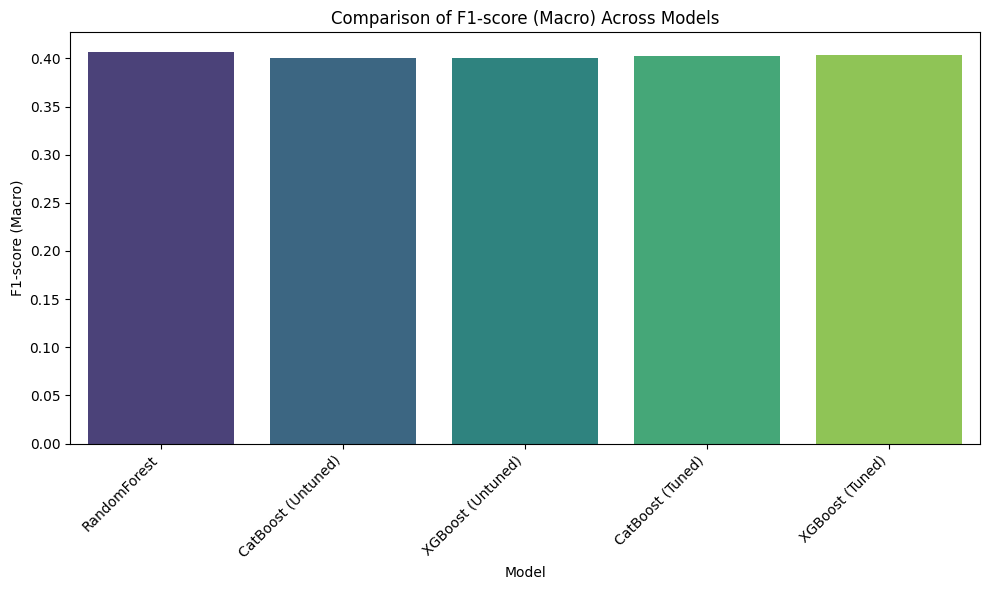

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score (macro)', data=model_performance, palette='viridis')
plt.title('Comparison of F1-score (Macro) Across Models')
plt.xlabel('Model')
plt.ylabel('F1-score (Macro)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
best_model_row = model_performance.loc[model_performance['Accuracy'].idxmax()]
best_model_name = best_model_row['Model']
best_model_metric_value = best_model_row['Accuracy']

print("\n--- Model Performance Summary and Recommendation ---")
print(f"The model with the highest Accuracy is: {best_model_name}")
print(f"Achieved Accuracy: {best_model_metric_value:.4f}")
print("This model is recommended for predicting diabetes status based on the Accuracy metric.")


--- Model Performance Summary and Recommendation ---
The model with the highest Accuracy is: XGBoost (Tuned)
Achieved Accuracy: 0.8508
This model is recommended for predicting diabetes status based on the Accuracy metric.


In [39]:
feature_importances = best_xgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Most Important Features for Tuned XGBoost Model:")
display(importance_df.head(10))

Top 10 Most Important Features for Tuned XGBoost Model:


,Feature,Importance
0,HighBP,0.480002
11,GenHlth,0.130180
1,HighChol,0.108728
14,DiffWalk,0.079857
3,BMI,0.038646
16,Age,0.036232
10,HvyAlcoholConsump,0.029296
6,HeartDiseaseorAttack,0.028776
2,CholCheck,0.027730
15,Sex,0.011807


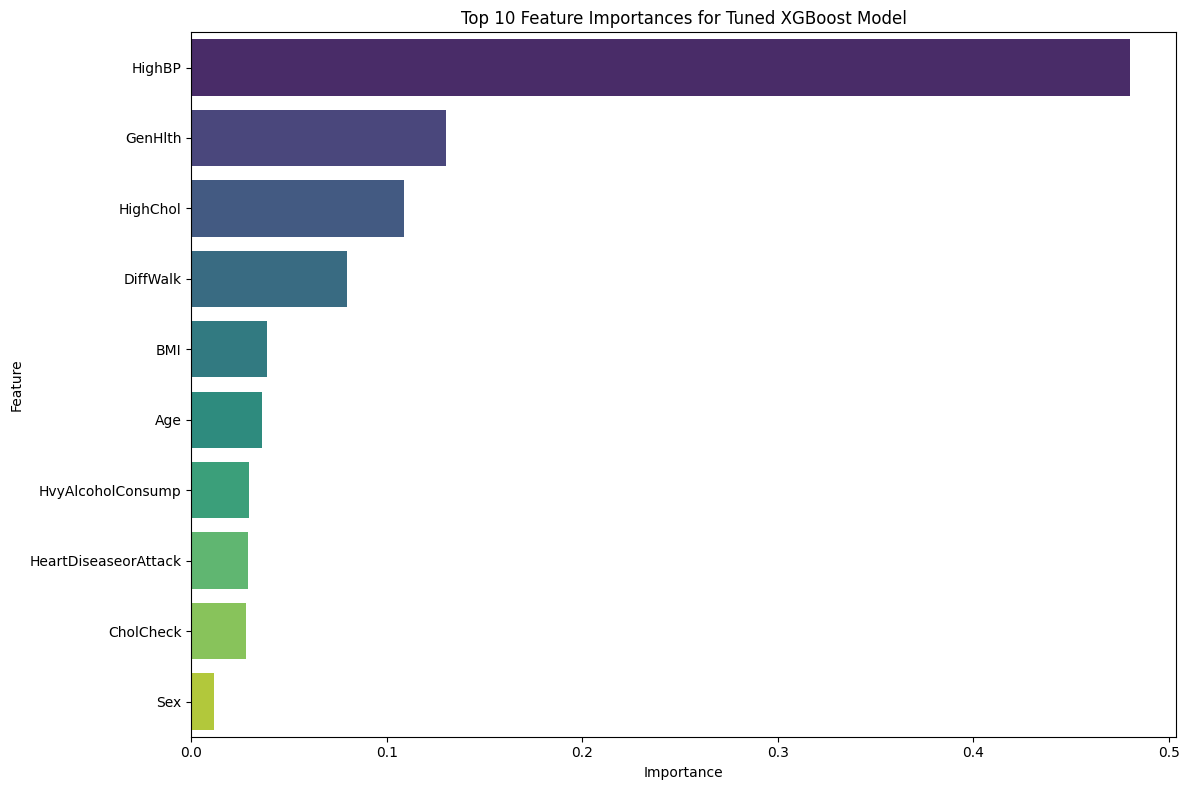

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), hue='Feature', palette='viridis', legend=False)
plt.title('Top 10 Feature Importances for Tuned XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Summary:

### Q&A
The best-performing model among the five compared models (RandomForest, CatBoost (Untuned), XGBoost (Untuned), CatBoost (Tuned), XGBoost (Tuned)) is the XGBoost (Tuned) model, achieving the highest Accuracy.

### Data Analysis Key Findings
*   A bar plot was successfully generated to visually compare the F1-score (macro) of all five models.
*   The XGBoost (Tuned) model exhibited the highest Accuracy at 0.8508.
*   The tuned versions of CatBoost and XGBoost showed slight improvements over their untuned counterparts in terms of accuracy.

### Insights or Next Steps
*   Based on Accuracy, the XGBoost (Tuned) model is recommended for predicting diabetes status due to its superior performance.
*   Further investigation could involve a more in-depth hyperparameter tuning process for CatBoost and XGBoost, potentially using a wider range of parameters or more sophisticated search strategies, to see if their performance can be further optimized.
*   Consider ensemble methods to combine the strengths of multiple models.

XGBoost (Extreme Gradient Boosting) adalah algoritma ensemble yang sangat populer dan kuat, terutama dalam tugas klasifikasi dan regresi. Berikut beberapa alasan mengapa XGBoost (Tuned) kemungkinan menjadi model terbaik dalam kasus ini:

Akurasi Tinggi: Model XGBoost (Tuned) mencapai Akurasi tertinggi sebesar 0.8508 di antara semua model yang dibandingkan. Akurasi yang tinggi menunjukkan bahwa model ini mampu membuat prediksi yang benar untuk sebagian besar sampel dalam dataset.

Peningkatan dari Tuning: Fakta bahwa model XGBoost yang tuned memiliki akurasi yang lebih tinggi daripada versi untuned-nya menunjukkan bahwa proses hyperparameter tuning berhasil mengoptimalkan kinerja model. Tuning membantu menemukan kombinasi parameter terbaik yang memungkinkan model belajar pola dalam data secara lebih efektif.

Kemampuan Menangani Data Kompleks: XGBoost dikenal sangat baik dalam menangani berbagai jenis data, termasuk yang memiliki banyak fitur, fitur kategori, dan hubungan non-linear. Data kesehatan seringkali kompleks dan melibatkan banyak faktor, sehingga XGBoost cocok untuk tugas ini.

Regularisasi untuk Mencegah Overfitting: XGBoost menyertakan teknik regularisasi (L1 dan L2) yang membantu mencegah overfitting. Ini berarti model tidak hanya menghafal data pelatihan tetapi juga mampu menggeneralisasi dengan baik ke data baru yang belum pernah dilihat sebelumnya (data uji).

Penanganan Nilai yang Hilang (Missing Values): XGBoost memiliki penanganan bawaan untuk nilai yang hilang, yang bisa menjadi keuntungan besar karena tidak memerlukan pra-pemrosesan khusus untuk imputasi nilai yang hilang, meskipun dalam kasus ini data Anda tidak memiliki nilai yang hilang setelah tahap pembersihan.

Gradient Boosting yang Efektif: Sebagai algoritma gradient boosting, XGBoost secara iteratif membangun model dengan memperbaiki kesalahan dari model sebelumnya. Pendekatan ini sering menghasilkan model yang sangat akurat.

Dalam konteks prediksi diabetes, akurasi yang tinggi sangat penting karena keputusan yang dibuat berdasarkan prediksi ini dapat memengaruhi kesehatan pasien.